#Image Classification Task:
• Load the MNIST dataset.
• Build a simple convolutional neural network (CNN) using Keras Sequential model.
• Train the CNN model on the MNIST dataset.
• Evaluate the model's performance on a test set and report accuracy.
• Use grid search to optimize hyperparameters such as learning rate, batch size, and
optimizer choice.
• Use Callback functions to automate training process like “ReduceLROnPlateau” and keep
check on validation loss. Also use history object for result visualization.


In [2]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape to [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# Normalize from 0-255 to 0-1
X_train /= 255
X_test /= 255

# One hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [4]:
from keras.callbacks import ReduceLROnPlateau

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, callbacks=[reduce_lr], verbose=2)


Epoch 1/10
300/300 - 38s - loss: 0.2387 - accuracy: 0.9317 - val_loss: 0.0820 - val_accuracy: 0.9743 - lr: 0.0010 - 38s/epoch - 127ms/step
Epoch 2/10
300/300 - 41s - loss: 0.0667 - accuracy: 0.9807 - val_loss: 0.0575 - val_accuracy: 0.9811 - lr: 0.0010 - 41s/epoch - 136ms/step
Epoch 3/10
300/300 - 25s - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0418 - val_accuracy: 0.9866 - lr: 0.0010 - 25s/epoch - 83ms/step
Epoch 4/10
300/300 - 25s - loss: 0.0343 - accuracy: 0.9897 - val_loss: 0.0380 - val_accuracy: 0.9876 - lr: 0.0010 - 25s/epoch - 84ms/step
Epoch 5/10
300/300 - 32s - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0390 - val_accuracy: 0.9863 - lr: 0.0010 - 32s/epoch - 107ms/step
Epoch 6/10
300/300 - 28s - loss: 0.0215 - accuracy: 0.9935 - val_loss: 0.0356 - val_accuracy: 0.9881 - lr: 0.0010 - 28s/epoch - 95ms/step
Epoch 7/10
300/300 - 30s - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0357 - val_accuracy: 0.9887 - lr: 0.0010 - 30s/epoch - 101ms/step
Epoch 8/10
300/300 - 25s - los

In [5]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.06%


In [6]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def build_model(learning_rate=0.001):
    model = Sequential([
        Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Grid search settings
learning_rates = [0.001, 0.0001]
batch_sizes = [32, 64]

# Grid search
best_accuracy = 0
best_lr = 0
best_batch = 0

for lr in learning_rates:
    for batch_size in batch_sizes:
        model = build_model(learning_rate=lr)
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=batch_size, verbose=0)
        accuracy = np.max(history.history['val_accuracy'])
        print(f"LR={lr}, Batch={batch_size}, Val Accuracy={accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_lr = lr
            best_batch = batch_size

print(f"Best parameters: LR={best_lr}, Batch={best_batch}, with accuracy={best_accuracy}")


LR=0.001, Batch=32, Val Accuracy=0.988099992275238
LR=0.001, Batch=64, Val Accuracy=0.9901999831199646
LR=0.0001, Batch=32, Val Accuracy=0.9842000007629395
LR=0.0001, Batch=64, Val Accuracy=0.9832000136375427
Best parameters: LR=0.001, Batch=64, with accuracy=0.9901999831199646


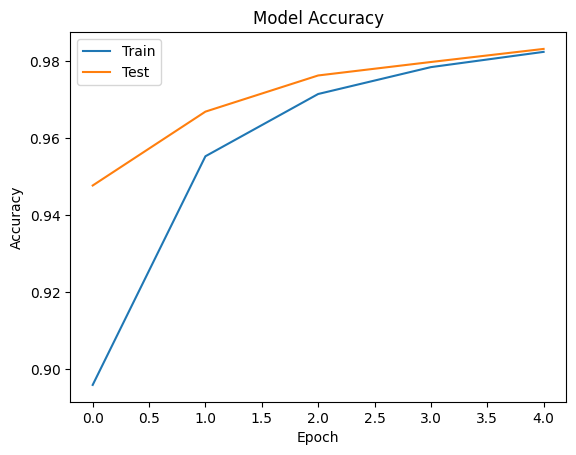

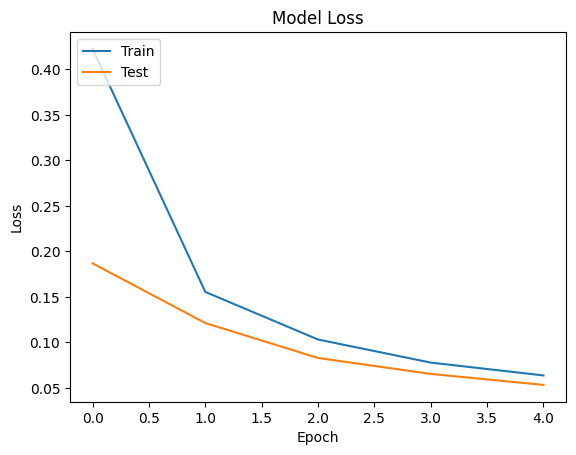

In [7]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#Text Classification Task:
* Load the IMDb movie reviews dataset.
* Preprocess the text data (tokenization, padding).
* Build a simple recurrent neural network (RNN) for text classification.
* Train the RNN model on the IMDb dataset.
* Evaluate the model's performance on a test set and report accuracy.
* Use grid search to optimize hyperparameters such as learning rate, batch size, and
optimizer choice.
* Use Callback functions to automate training process like “ReduceLROnPlateau” and keep
check on validation loss. Also use history object for result visualization.

In [8]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset
vocab_size = 10000  # Consider only the top 10,000 words in the dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Inspect
print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")


17464789/17464789 [==============================] - 0s 0us/step
Training samples: 25000
Test samples: 25000


In [9]:
max_length = 500  # Maximum length of all sequences

x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

def build_rnn():
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=32, input_length=max_length),
        SimpleRNN(32),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_rnn()
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 322113 (1.23 MB)
Trainable params: 322113 (1.23 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 25s 152ms/step - loss: 0.6020 - accuracy: 0.6657 - val_loss: 0.4370 - val_accuracy: 0.8114
Epoch 2/10
157/157 [==============================] - 24s 151ms/step - loss: 0.3702 - accuracy: 0.8475 - val_loss: 0.3832 - val_accuracy: 0.8366
Epoch 3/10
157/157 [==============================] - 24s 151ms/step - loss: 0.2475 - accuracy: 0.9045 - val_loss: 0.3843 - val_accuracy: 0.8380
Epoch 4/10
157/157 [==============================] - 24s 151ms/step - loss: 0.1559 - accuracy: 0.9455 - val_loss: 0.3948 - val_accuracy: 0.8430
Epoch 5/10
157/157 [==============================] - 24s 151ms/step - loss: 0.0825 - accuracy: 0.9756 - val_loss: 0.4556 - val_accuracy: 0.8342
Epoch 6/10
157/157 [==============================] - 23s 145ms/step - loss: 0.0432 - accuracy: 0.9902 - val_loss: 0.5005 - val_accuracy: 0.8416
Epoch 7/10
157/157 [==============================] - 23s 149ms/step - loss: 0.0223 - accuracy: 0.9959 - val_loss: 0.5480 - val_ac

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np

def build_rnn(optimizer='adam', learning_rate=0.001):
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")

    model = Sequential([
        Embedding(input_dim=10000, output_dim=32, input_length=500),
        SimpleRNN(32),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

learning_rates = [0.001, 0.0001]
batch_sizes = [64, 128]
optimizers = ['adam', 'sgd']

best_acc = 0
best_params = {}

for optimizer in optimizers:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            print(f"Training with optimizer={optimizer}, learning_rate={lr}, batch_size={batch_size}")
            model = build_rnn(optimizer=optimizer, learning_rate=lr)
            model.fit(x_train, y_train, epochs=3, batch_size=batch_size, validation_split=0.2, verbose=0)
            loss, acc = model.evaluate(x_test, y_test, verbose=0)
            print(f"Accuracy: {acc}, Loss: {loss}")

            if acc > best_acc:
                best_acc = acc
                best_params = {'optimizer': optimizer, 'learning_rate': lr, 'batch_size': batch_size}

print(f"Best accuracy: {best_acc} with parameters {best_params}")


Training with optimizer=adam, learning_rate=0.001, batch_size=64
Accuracy: 0.8517199754714966, Loss: 0.4046918451786041
Training with optimizer=adam, learning_rate=0.001, batch_size=128
Accuracy: 0.835319995880127, Loss: 0.40527573227882385
Training with optimizer=adam, learning_rate=0.0001, batch_size=64
Accuracy: 0.6943600177764893, Loss: 0.5941359996795654
Training with optimizer=adam, learning_rate=0.0001, batch_size=128
Accuracy: 0.5624799728393555, Loss: 0.6787932515144348
Training with optimizer=sgd, learning_rate=0.001, batch_size=64


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


782/782 [==============================] - 23s 30ms/step - loss: 0.5620 - accuracy: 0.8220
Test Accuracy: 0.8220


In [13]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=[reduce_lr])


Epoch 1/10
157/157 [==============================] - 29s 183ms/step - loss: 0.1971 - accuracy: 0.9220 - val_loss: 0.4980 - val_accuracy: 0.8242 - lr: 0.0010
Epoch 2/10
157/157 [==============================] - 23s 144ms/step - loss: 0.1921 - accuracy: 0.9299 - val_loss: 0.5388 - val_accuracy: 0.7888 - lr: 0.0010
Epoch 3/10
157/157 [==============================] - 24s 152ms/step - loss: 0.2081 - accuracy: 0.9191 - val_loss: 0.5413 - val_accuracy: 0.7844 - lr: 0.0010
Epoch 4/10
157/157 [==============================] - 24s 156ms/step - loss: 0.1451 - accuracy: 0.9471 - val_loss: 0.4578 - val_accuracy: 0.8292 - lr: 0.0010
Epoch 5/10
157/157 [==============================] - 24s 151ms/step - loss: 0.0802 - accuracy: 0.9746 - val_loss: 0.5153 - val_accuracy: 0.8262 - lr: 0.0010
Epoch 6/10
157/157 [==============================] - 24s 152ms/step - loss: 0.0491 - accuracy: 0.9868 - val_loss: 0.5555 - val_accuracy: 0.8268 - lr: 0.0010
Epoch 7/10
157/157 [==============================] 

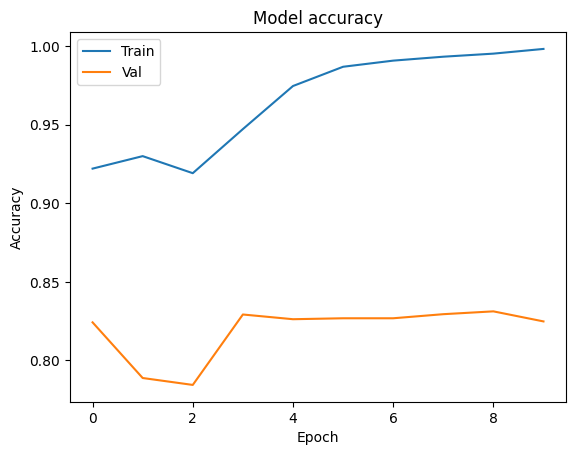

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
